# Prodigy infotech Task 2 Answer

       PassengerId    Survived         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838   29.361582    0.523008    0.381594   32.204208
std     257.353842    0.486592   13.019697    1.102743    0.806057   49.693429
min       1.000000    0.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000   22.000000    0.000000    0.000000    7.910400
50%     446.000000    0.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    1.000000   35.000000    1.000000    0.000000   31.000000
max     891.000000    1.000000   80.000000    8.000000    6.000000  512.329200


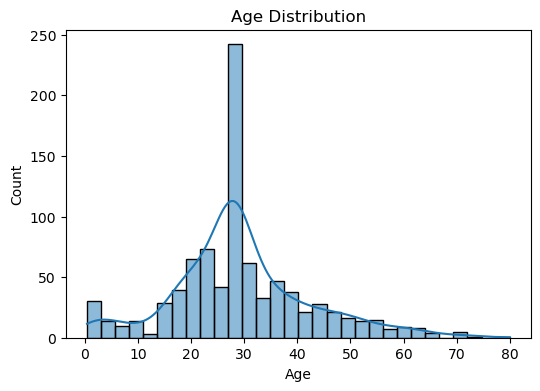

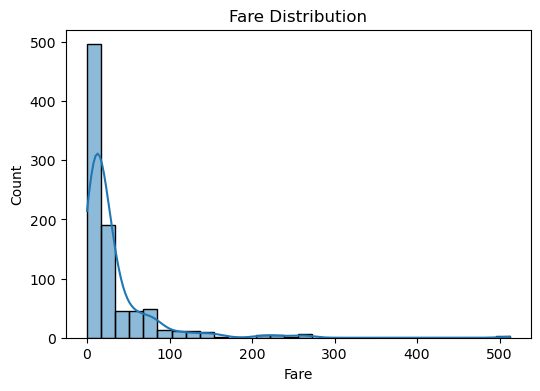

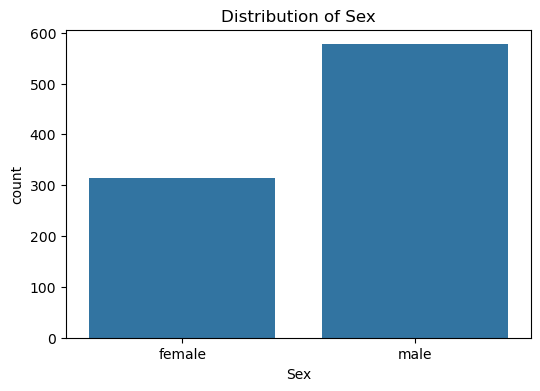

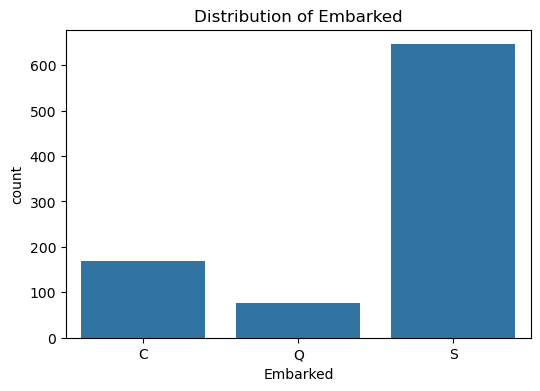

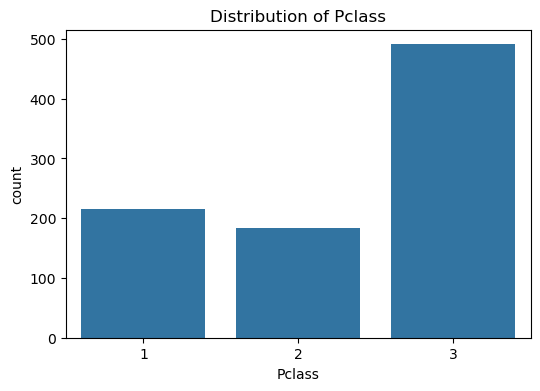

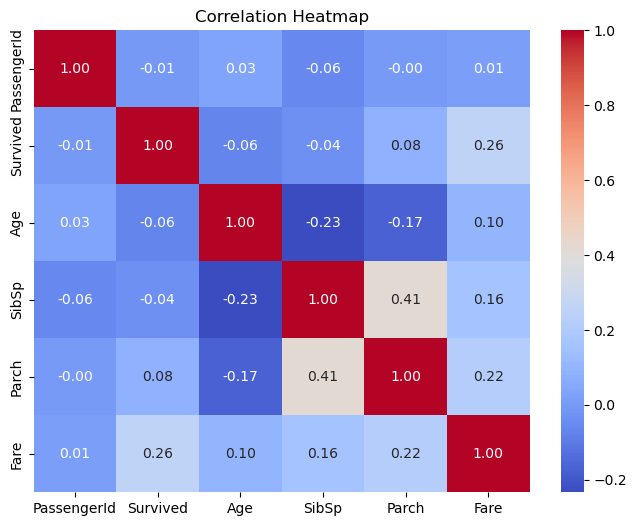

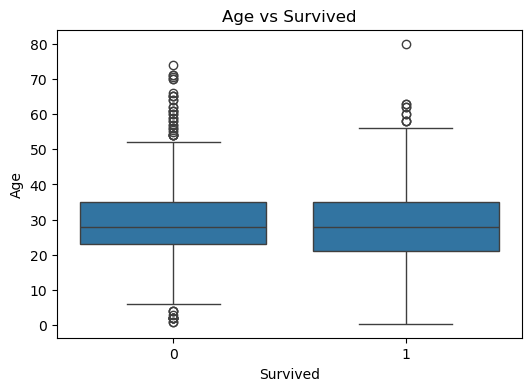

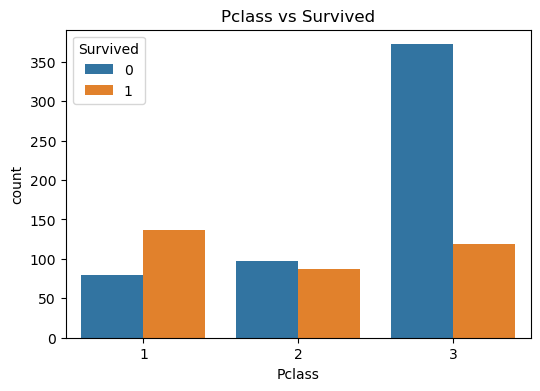

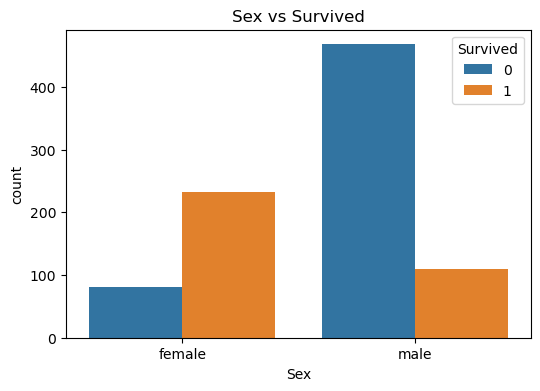

Survival rate by Sex:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Survival rate by Pclass:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Survival rate by Embarked:
 Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Data Cleaning
# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())  # Impute Age with median
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Impute Embarked with mode
df.drop(columns='Cabin', inplace=True)  # Drop Cabin column due to too many missing values

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Convert categorical columns to category type
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

# EDA
# Summary statistics for numerical features
print(df.describe())

# Plot distribution of Age
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Plot distribution of Fare
plt.figure(figsize=(6, 4))
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.show()

# Plot distribution of Sex
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex')
plt.title('Distribution of Sex')
plt.show()

# Plot distribution of Embarked
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Embarked')
plt.title('Distribution of Embarked')
plt.show()

# Plot distribution of Pclass
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass')
plt.title('Distribution of Pclass')
plt.show()


# Heatmap to show correlation between numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Select only numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Relationship between Age and Survived
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age vs Survived')
plt.show()

# Relationship between Pclass and Survived
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Pclass vs Survived')
plt.show()

# Relationship between Sex and Survived
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Sex vs Survived')
plt.show()

# Calculate survival rates by Sex, Pclass, and Embarked with observed=True to avoid FutureWarning
print("Survival rate by Sex:\n", df.groupby('Sex', observed=True)['Survived'].mean())
print("Survival rate by Pclass:\n", df.groupby('Pclass', observed=True)['Survived'].mean())
print("Survival rate by Embarked:\n", df.groupby('Embarked', observed=True)['Survived'].mean())
